In [1]:
import sys
import sklearn
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Regression Voting Ensemble: 
    Predictions are the average of contributing models.
# Classification Voting Ensemble: 
Predictions are the majority vote of contributing models.

# Simple Ensemble Techniques

1) Max Voting


2) Averaging


3) Weighted Averagin

# 1 Max Voting

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction

In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

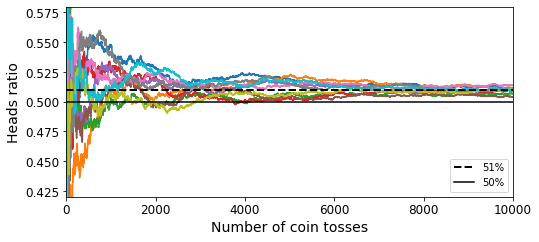

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.show()

Suppose you have a slightly biased coin that has a 51% chance of coming up heads,
and 49% chance of coming up tails. If you toss it 1,000 times, you will generally get
more or less 510 heads and 490 tails, and hence a majority of heads. If you do the
math, you will find that the probability of obtaining a majority of heads after 1,000
tosses is close to 75%. The more you toss the coin, the higher the probability (e.g.,
with 10,000 tosses, the probability climbs over 97%). This is due to the law of large
numbers: as you keep tossing the coin, the ratio of heads gets closer and closer to the
probability of heads (51%). Figure 7-3 shows 10 series of biased coin tosses. You can
see that as the number of tosses increases, the ratio of heads approaches 51%. Eventu‐
ally all 10 series end up so close to 51% that they are consistently above 50%.

Similarly, suppose you build an ensemble containing 1,000 classifiers that are individ‐
ually correct only 51% of the time (barely better than random guessing). If you pre‐
dict the majority voted class, you can hope for up to 75% accuracy! However, this is
only true if all classifiers are perfectly independent, making uncorrelated errors,
which is clearly not the case since they are trained on the same data. They are likely to
make the same types of errors, so there will be many majority votes for the wrong
class, reducing the ensemble’s accuracy.

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# EXAMPLE OF MAX VOTING CLASSIFICATION

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [6]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# TWO TYPES OF MAX VOTING 

1) Hard Voting 


2) Soft Voting

# 1) Hard Voting : Predict the class with the largest sum of votes from models

is the simplest case of majority voting. Here, we predict the class label y^ via majority (plurality) voting of each classifier

y^=mode{C1(x),C2(x),...,Cm(x)}

Assuming that we combine three classifiers that classify a training sample as follows:

classifier 1 -> class 0 classifier 2 -> class 0 classifier 3 -> class 1

y^=mode{0,0,1}=0

Via majority vote, we would we would classify the sample as "class 0."

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


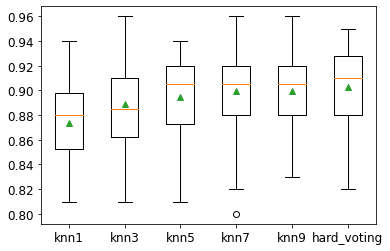

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y
 
# get a voting ensemble of models
def get_voting():
# define the base models
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
# define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_voting()
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Example 2 Hard Voting Binary classification

In [10]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
# define the base models
models = list()
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
# define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


# 2) Soft voting : Based on probabilities

f all classifiers are able to estimate class probabilities (i.e. they have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers.

This is called soft voting and it often achieves higher performance than hard voting because it gives more weight to highly confident votes.

To perform soft voting, all you need to do is replace voting='hard' with voting='soft' **and ensure that all classifiers can estimate class probabilities.

>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.923 (0.027)


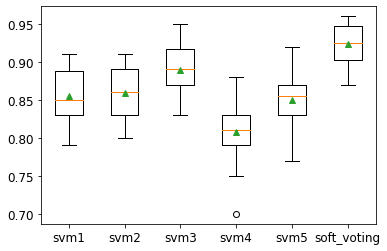

In [11]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
	models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
	models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
	models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
	models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
	models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
	models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
	models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
	models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
	models['soft_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Binary classification by soft voting

In [12]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
# define the base models
models = list()
models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
# define the soft voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


# Averaging Ensemble Technique

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

For example, in the below case, the averaging method would take the average of all the values.

i.e. (5+4+5+4+4)/5 = 4.4

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
features = boston.feature_names
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


I'll work with only one feature for easy visualization

In [14]:
X = X[:,5].reshape(-1, 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

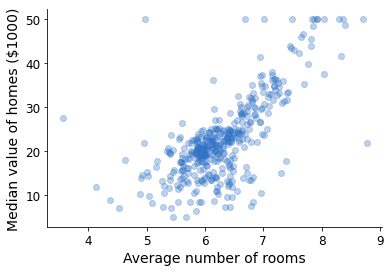

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_train, y_train, facecolor=None, edgecolor='royalblue', alpha=.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Average number of rooms')
ax.set_ylabel('Median value of homes ($1000)')

plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model_1 = LinearRegression()
model_2 = DecisionTreeRegressor(max_depth=3, random_state=0)

Then, I need to generate out-of-fold (oof) predictions on the train set.
I create arrays to store predictions made on the train data. Then I do a 5 folds cross validation. On each fold:

train the models with train fold
get predictions on validation fold
store the predictions in oof array
At the end of cross validation, we will have an array for each model with predictions made on the training set. I will use those predictions as features to train my ensembled model

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,shuffle = True, random_state=0)

nrows_trn = X_train.shape[0]

mod1_oof_trn = np.empty(nrows_trn)
mod2_oof_trn = np.empty(nrows_trn)

mod1_scores = np.empty(5)
mod2_scores = np.empty(5)

for k, (trn_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    X_trn, X_val = X_train[trn_idx], X_train[val_idx]
    y_trn, y_val = y_train[trn_idx], y_train[val_idx]
    
    model_1.fit(X_trn, y_trn)
    mod1_oof_trn[val_idx] = model_1.predict(X_val)
    mod1_scores[k] = mean_squared_error(y_val, mod1_oof_trn[val_idx])
    
    model_2.fit(X_trn, y_trn)
    mod2_oof_trn[val_idx] = model_2.predict(X_val)
    mod2_scores[k] = mean_squared_error(y_val, mod2_oof_trn[val_idx])

 I have the predictions on the train set, I can fit my models on all the train data to get predictions on the test set.
An alternative way would be to make predictions on the test set during cross validation and average the 5 prediction

In [21]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

mod1_predictions = model_1.predict(X_test)
mod2_predictions = model_2.predict(X_test)

Model 1 CV score: 43.4815 (12.1553)
Model 2 CV score: 41.7297 (9.1552)


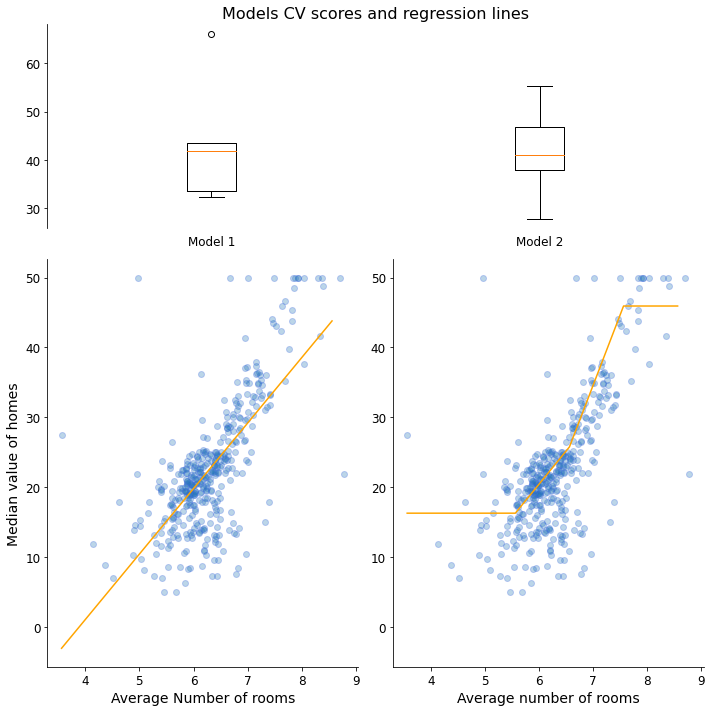

In [22]:
import matplotlib.gridspec as gridspec

print('Model 1 CV score: {:.4f} ({:.4f})'.format(mod1_scores.mean(),
                                                 mod1_scores.std()))
print('Model 2 CV score: {:.4f} ({:.4f})'.format(mod2_scores.mean(),
                                                 mod2_scores.std()))

fig = plt.figure(figsize=(10, 10))
G = gridspec.GridSpec(2, 2,
                     height_ratios=[1, 2])

ax1 = plt.subplot(G[0, :])
ax1.boxplot([mod1_scores, mod2_scores])
ax1.set_title('Models CV scores and regression lines', fontsize=16)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticklabels(['Model 1', 'Model 2'], fontsize=12)
ax1.tick_params(bottom=False)

ax2 = plt.subplot(G[1, 0])

X_plot = np.arange(X_train.min(), X_train.max()).reshape(-1, 1)
y_plot = model_1.predict(X_plot)

ax2.scatter(X_train, y_train, facecolor=None, edgecolor='royalblue', alpha=.3)
ax2.plot(X_plot, y_plot, 'orange')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Average Number of rooms')
ax2.set_ylabel('Median value of homes')

ax3 = plt.subplot(G[1, 1], sharey=ax2)

X_plot = np.arange(X_train.min(), X_train.max()).reshape(-1, 1)
y_plot = model_2.predict(X_plot)

ax3.scatter(X_train, y_train, facecolor=None, edgecolor='royalblue', alpha=.3)
ax3.plot(X_plot, y_plot, 'orange')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel('Average number of rooms')

plt.tight_layout()
plt.show()

I am now going to calculate the final predictions by calculating the weighted average of the predictions of those two models.
I will use scipy.optimize to find the best weights.
First, I blend the predictions in a matrix where each row is a sample and each column is the prediction from one of the models.

In [23]:
train_predictions = np.concatenate([mod1_oof_trn[:, None],
                                    mod2_oof_trn[:, None]], axis=1)

# Preview the first five rows
train_predictions[:5]

array([[28.53576705, 29.4826087 ],
       [19.39890902, 19.59806452],
       [28.30164277, 31.81428571],
       [19.95707752, 19.78670886],
       [13.39043904, 16.48550725]])

# objective function that I will have to minimize

In [24]:
def objective(weights):
    """ Calculate the score of a weighted average of predictions
    
    Parameters
    ----------
    weights: array
        the weights applied to the average of the base predictions
        
    Returns
    -------
    float
        The mean_squared_error score of the ensemble
    """
    y_ens = np.average(train_predictions, axis=1, weights=weights)
    return mean_squared_error(y_train, y_ens)

use the minimize function from scipy.optimize to find the weights that will give the lowest MSE score.

In [25]:
from scipy.optimize import minimize

# I define initial weights from which the algorithm will try searching a minima
# I usually set the initial weigths to be the same for each columns, but they
# can be set randomly
w0 = np.empty(train_predictions.shape[1])
w0.fill(1 / train_predictions.shape[1])

# I define bounds, i.e. lower and upper values of weights.
# I want the weights to be between 0 and 1.
bounds = [(0,1)] * train_predictions.shape[1]

# I set some constraints. Here, I want the sum of the weights to be equal to 1
cons = [{'type': 'eq',
         'fun': lambda w: w.sum() - 1}]

# Then, I try to find the weights that will minimize my objective function.
# There are several solvers (methods) to choose from. I use SLSQP because
# it can handle constraints.
res = minimize(objective,
               w0,
               method='SLSQP',
               bounds=bounds,
               options={'disp':True, 'maxiter':10000},
               constraints=cons)

best_weights = res.x

print('\nOptimized weights:')
print('Model 1: {:.4f}'.format(best_weights[0]))
print('Model 2: {:.4f}'.format(best_weights[1]))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.3242877767981
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2

Optimized weights:
Model 1: 0.4492
Model 2: 0.5508


# ON TEST DATA

In [26]:
print('Model 1 test score = {:.4f}'.format(mean_squared_error(y_test, mod1_predictions)))
print('Model 2 test score = {:.4f}'.format(mean_squared_error(y_test, mod2_predictions)))

# unoptimized ensemble
test_predictions = np.concatenate([mod1_predictions[:, None],
                                   mod2_predictions[:, None]], axis=1)
unoptimized_ensemble = np.average(test_predictions, axis=1, weights=w0)
print('Unoptimized ensemble test score: {:.4f}'.format(mean_squared_error(y_test,
                                                                          unoptimized_ensemble)))

Model 1 test score = 46.9074
Model 2 test score = 40.2115
Unoptimized ensemble test score: 40.2323


In [27]:
# optimized ensemble
optimized_ensemble = np.average(test_predictions, axis=1, weights=best_weights)
print('Optimized ensemble test score: {:.4f}'.format(mean_squared_error(y_test,
                                                                        optimized_ensemble)))

Optimized ensemble test score: 39.9266


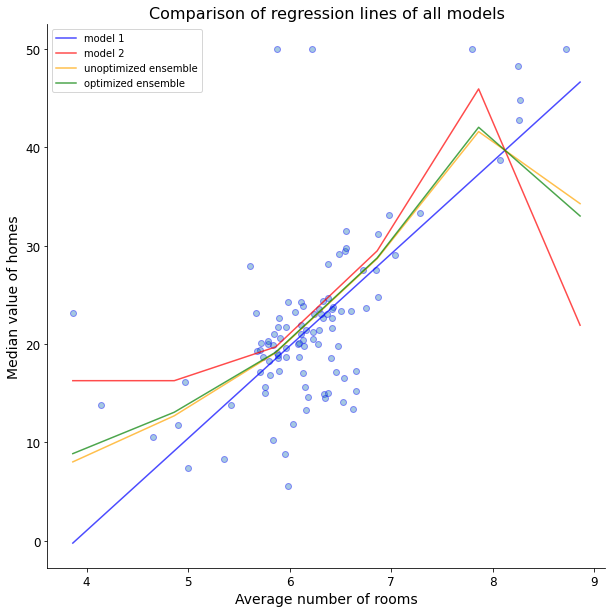

In [28]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(X_test, y_test, color=None, edgecolor='b', alpha=.4)

X_plot = np.arange(X_test.min(), X_test.max() + 1).reshape(-1, 1)
line_1 = model_1.predict(X_plot)
line_2 = model_2.predict(X_plot)
blend = np.concatenate([line_1[:, None],
                        line_2[:, None]], axis=1)
line_ens = np.average(blend, axis=1, weights=w0)
line_opt = np.average(blend, axis=1, weights=best_weights)

ax.plot(X_plot, model_1.predict(X_plot), c='b', alpha=.7, label='model 1')
ax.plot(X_plot, model_2.predict(X_plot), c='r', alpha=.7, label='model 2')
ax.plot(X_plot, line_ens, c='orange', alpha=.7, label='unoptimized ensemble')
ax.plot(X_plot, line_opt, c='g', alpha=.7, label='optimized ensemble')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Comparison of regression lines of all models', fontsize=16)
ax.set_xlabel('Average number of rooms')
ax.set_ylabel('Median value of homes')
plt.show()

# Weighted Average Ensemble

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

The result is calculated as [(5*0.23) + (4*0.23) + (5*0.18) + (4*0.18) + (4*0.18)] = 4.41.

# Sample Code:

model1 = tree.DecisionTreeClassifier()


model2 = KNeighborsClassifier()

model3= LogisticRegression()


model1.fit(x_train,y_train)

model2.fit(x_train,y_train)

model3.fit(x_train,y_train)


pred1=model1.predict_proba(x_test)

pred2=model2.predict_proba(x_test)

pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

1) Weighted Average Ensemble


2) Develop a Weighted Average Ensemble

3) Weighted Average Ensemble for Classification

4) Weighted Average Ensemble for Regression

For example, we may have the fixed weights of 0.84, 0.87, 0.75 for the ensemble member. These weights can be used to calculate the weighted average by multiplying each prediction by the model’s weight to give a weighted sum, then dividing the value by the sum of the weights. For example:

yhat = ((97.2 * 0.84) + (100.0 * 0.87) + (95.8 * 0.75)) / (0.84 + 0.87 + 0.75)
yhat = (81.648 + 87 + 71.85) / (0.84 + 0.87 + 0.75)
yhat = 240.498 / 2.46
yhat = 97.763


# Develop a Weighted Average Ensemble

# CLASSIFICATION

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('bayes', GaussianNB()))
	return models
 
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
	# fit and evaluate the models
	scores = list()
	for name, model in models:
		# fit the model
		model.fit(X_train, y_train)
		# evaluate the model
		yhat = model.predict(X_val)
		acc = accuracy_score(y_val, yhat)
		# store the performance
		scores.append(acc)
		# report model performance
	return scores
 
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_val, y_train, y_val)
print(scores)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train_full, y_train_full)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))
# evaluate each standalone model
scores = evaluate_models(models, X_train_full, X_test, y_train_full, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], scores[i]*100))
# evaluate equal weighting
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train_full, y_train_full)
yhat = ensemble.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Voting Accuracy: %.3f' % (score*100))

[0.8896969696969697, 0.86, 0.8812121212121212]
Weighted Avg Accuracy: 90.840
>lr: 87.800
>cart: 88.160
>bayes: 87.300
Voting Accuracy: 90.780


# REGRESSION

In [36]:
from numpy import argsort
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
 
# get a list of base models
def get_models():
	models = list()
	models.append(('knn', KNeighborsRegressor()))
	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
	return models
 
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
	# fit and evaluate the models
	scores = list()
	for name, model in models:
		# fit the model
		model.fit(X_train, y_train)
		# evaluate the model
		yhat = model.predict(X_val)
		mae = mean_absolute_error(y_val, yhat)
		# store the performance
		scores.append(-mae)
		# report model performance
	return scores
 
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_val, y_train, y_val)
print(scores)
ranking = 1 + argsort(argsort(scores))
print(ranking)
# create the ensemble
ensemble = VotingRegressor(estimators=models, weights=ranking)
# fit the ensemble on the training dataset
ensemble.fit(X_train_full, y_train_full)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('Weighted Avg MAE: %.3f' % (score))
# evaluate each standalone model
scores = evaluate_models(models, X_train_full, X_test, y_train_full, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], scores[i]))
# evaluate equal weighting
ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train_full, y_train_full)
yhat = ensemble.predict(X_test)
score = mean_absolute_error(y_test, yhat)
print('Voting MAE: %.3f' % (score))

[-101.97000126284476, -141.9736184729771, -153.9765827528269]
[3 2 1]
Weighted Avg MAE: 97.047
>knn: -100.169
>cart: -133.248
>svm: -138.195
Voting MAE: 102.394
